In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Loading data as a dataframe
df = pd.read_csv("/Users/karan/Downloads/kc_house_data.csv")

In [3]:
# Printing top 5 rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Statistical Description of each column of the dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Checking for null values present if any
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# Fetching year value from date column and storing it as a new column 'date_year' 
df['date_year'] = pd.to_datetime(df['date']).dt.strftime('%Y').astype(int)

In [7]:
# Creating a custom function that computes the new age of the house based on year built and year renovated
def new_age_function (row):
    if row['yr_renovated'] == 0:
        val = int(row['date_year']) - row['yr_built']
    else:
        val = int(row['date_year']) - row['yr_renovated']
    return val

In [8]:
# Applying the custom function on the dataframe and creating a new column
df['new_age'] = df.apply (lambda row: new_age_function(row), axis=1)

In [9]:
# Dropping unnecessary columns
df1 = df.drop(['id','date','yr_built','yr_renovated','date_year'], axis = 1)

In [10]:
# Dropping rows which have zero bathrooms or zero bedrooms
df1 = df1.drop(df[(df1['bathrooms'] == 0) | (df1['bedrooms'] == 0)].index)

In [11]:
#len(df1) #Around 16 rows have been dropped

In [12]:
# dropping duplicate rows if any
df1.drop_duplicates(keep=False,inplace=True)

In [13]:
#len(df1) #Thus we can see that about 10 duplicate rows have been removed

In [14]:
# Detecting outliers

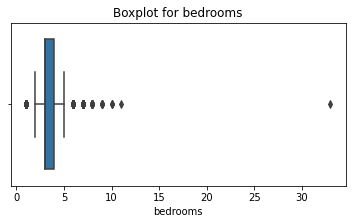

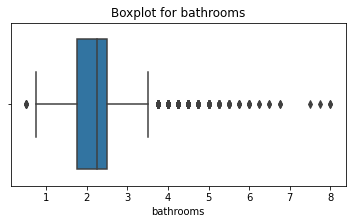

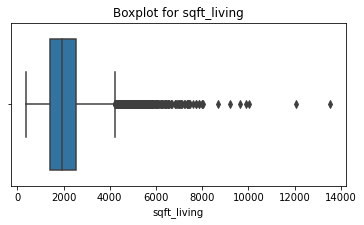

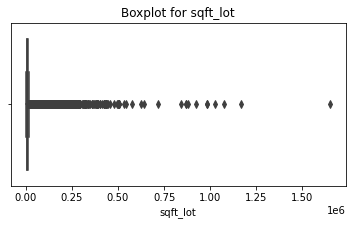

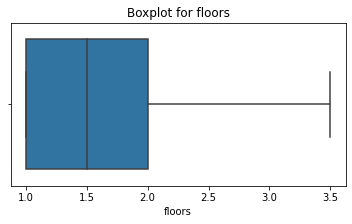

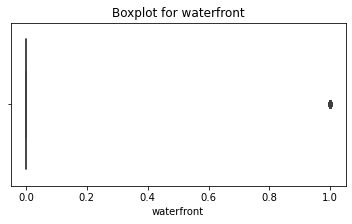

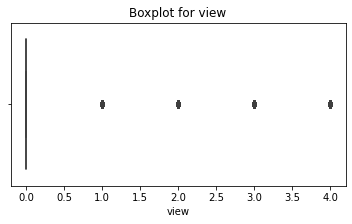

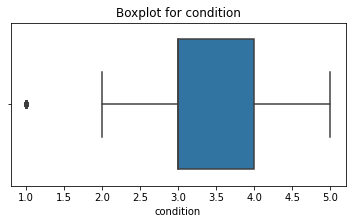

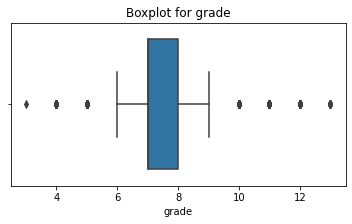

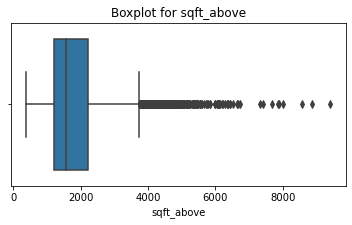

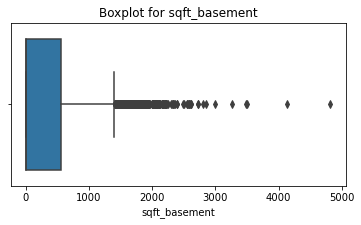

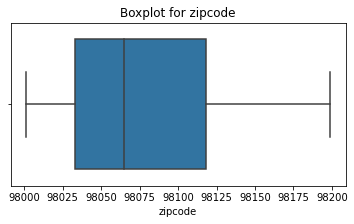

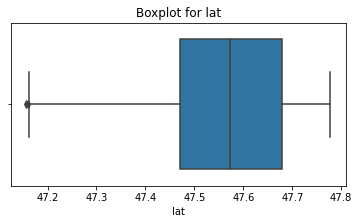

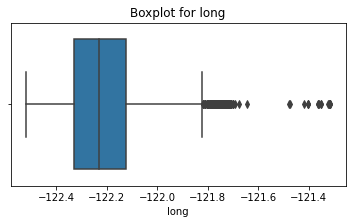

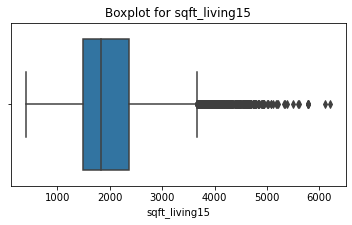

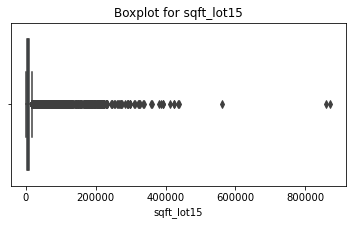

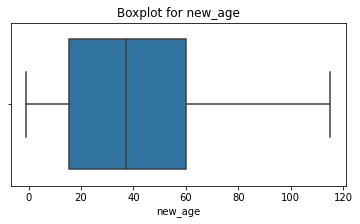

In [15]:
#Plotting the Box plots before outlier removal for each column
FeatureColumns = [c for c in df1.columns if c not in ['price']]
for i in FeatureColumns:
    data = df1[i]
    plt.figure(figsize=(6,3))
    b = sns.boxplot(x = data)
    plt.title('Boxplot for '+i)
    plt.show()

In [16]:
df1['waterfront'].value_counts()

0    21424
1      163
Name: waterfront, dtype: int64

<AxesSubplot:title={'center':'Histogram plot of view column'}>

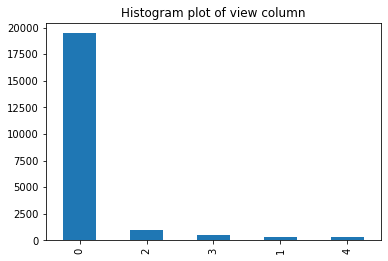

In [17]:
df1['view'].value_counts().plot(kind = 'bar', title = 'Histogram plot of view column')

<AxesSubplot:title={'center':'Grade column before transformation'}>

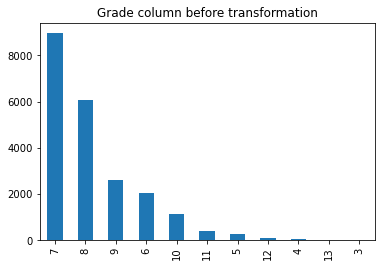

In [18]:
df1['grade'].value_counts().plot(kind = 'bar', title = 'Grade column before transformation')

In [19]:
# Dropping waterfront and view as the distribution of these columns are high for zero value
df1 = df1.drop(['waterfront','view'], axis = 1)

In [20]:
# Drop duplicate rows
df1 = df1.drop_duplicates(keep='last')

In [21]:
# Outlier Treatment for selected columns by clipping values outside the boundary to the boundary value
columns = [c for c in df1.columns if c not in ['floors','zipcode','new_age']]
df1[columns] = df1[columns].apply(lambda x: x.clip(*x.quantile([0.01, 0.99])))

Text(0.5, 1.0, 'Scatter plot of sqft_lot vs house price')

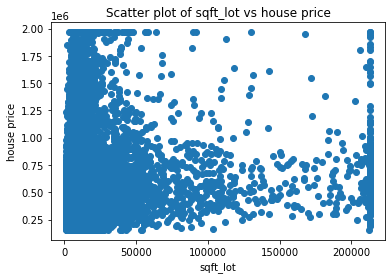

In [22]:
# Scatter plot
plt.scatter(df1['sqft_lot'],df1['price'])
plt.xlabel('sqft_lot')
plt.ylabel('house price')
plt.title('Scatter plot of sqft_lot vs house price')

In [23]:
# Standard Scaling for numeric feature columns
from sklearn.preprocessing import StandardScaler
columns = [c for c in df1.columns if c not in ['price','grade','condition']]
scaler = StandardScaler()
scaler.fit(df1[columns])
df1[columns] = scaler.transform(df1[columns])

<AxesSubplot:title={'center':'Grade column after binning'}>

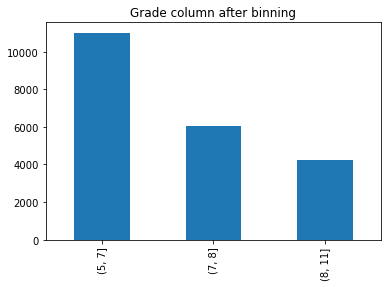

In [24]:
# Binning the categorical columns 
bins_grade = [5,7,8,11]
bins_condition = [1,3,4,5]
bins_grade = pd.cut(df1['grade'],bins_grade)
bins_condition = pd.cut(df1['condition'],bins_condition)
bins_grade.value_counts().plot(kind='bar', title = 'Grade column after binning')

In [25]:
bins_grade = bins_grade.cat.as_unordered()
bins_condition = bins_condition.cat.as_unordered()

In [26]:
# Convert categorical variable into indicator variables.
dummy_condition = pd.get_dummies(bins_condition, prefix='condition')
dummy_grade = pd.get_dummies(bins_grade, prefix='grade')

In [27]:
# Concatenating the new dummy dataframes to the main dataframe
df1 = pd.concat([df1, dummy_condition, dummy_grade], axis = 1)

In [28]:
df1 = df1.drop(['condition','grade'], axis = 1)

In [29]:
# Top 5 rows of new dataframe
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,new_age,"condition_(1, 3]","condition_(3, 4]","condition_(4, 5]","grade_(5, 7]","grade_(7, 8]","grade_(8, 11]"
0,221900.0,-0.434987,-1.487878,-1.021508,-0.300969,-0.915238,-0.757287,-0.672049,1.869369,-0.359471,-0.310005,-0.964372,-0.319819,0.626290,1,0,0,1,0,0
1,538000.0,-0.434987,0.186146,0.571407,-0.243461,0.938510,0.487980,0.260000,0.879044,1.168163,-0.759826,-0.439485,-0.219646,-0.623177,1,0,0,1,0,0
2,180000.0,-1.589978,-1.487878,-1.491360,-0.143834,-0.915238,-1.273004,-0.672049,-0.933438,1.291218,-0.135881,1.105184,-0.198342,1.424560,1,0,0,1,0,0
3,604000.0,0.720003,1.190560,-0.127642,-0.324449,-0.915238,-0.920807,1.448361,1.084583,-0.289570,-1.296708,-0.934378,-0.352555,0.279216,0,0,1,1,0,0
4,510000.0,-0.434987,-0.148659,-0.448517,-0.213190,-0.915238,-0.128364,-0.672049,-0.073911,0.409443,1.228090,-0.274520,-0.226495,-0.449640,1,0,0,0,1,0


In [30]:
# Separating dataframe into features and target variables 
X = df1.drop(['price'],axis = 1)
Y = df1['price']

In [31]:
# Splitting them into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [32]:
# Dataframe shape of the training and testing sets
print('Training Features Shape:', X_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape: (14463, 19)
Testing Features Shape: (7124, 19)
Training Labels Shape: (14463,)
Testing Labels Shape: (7124,)


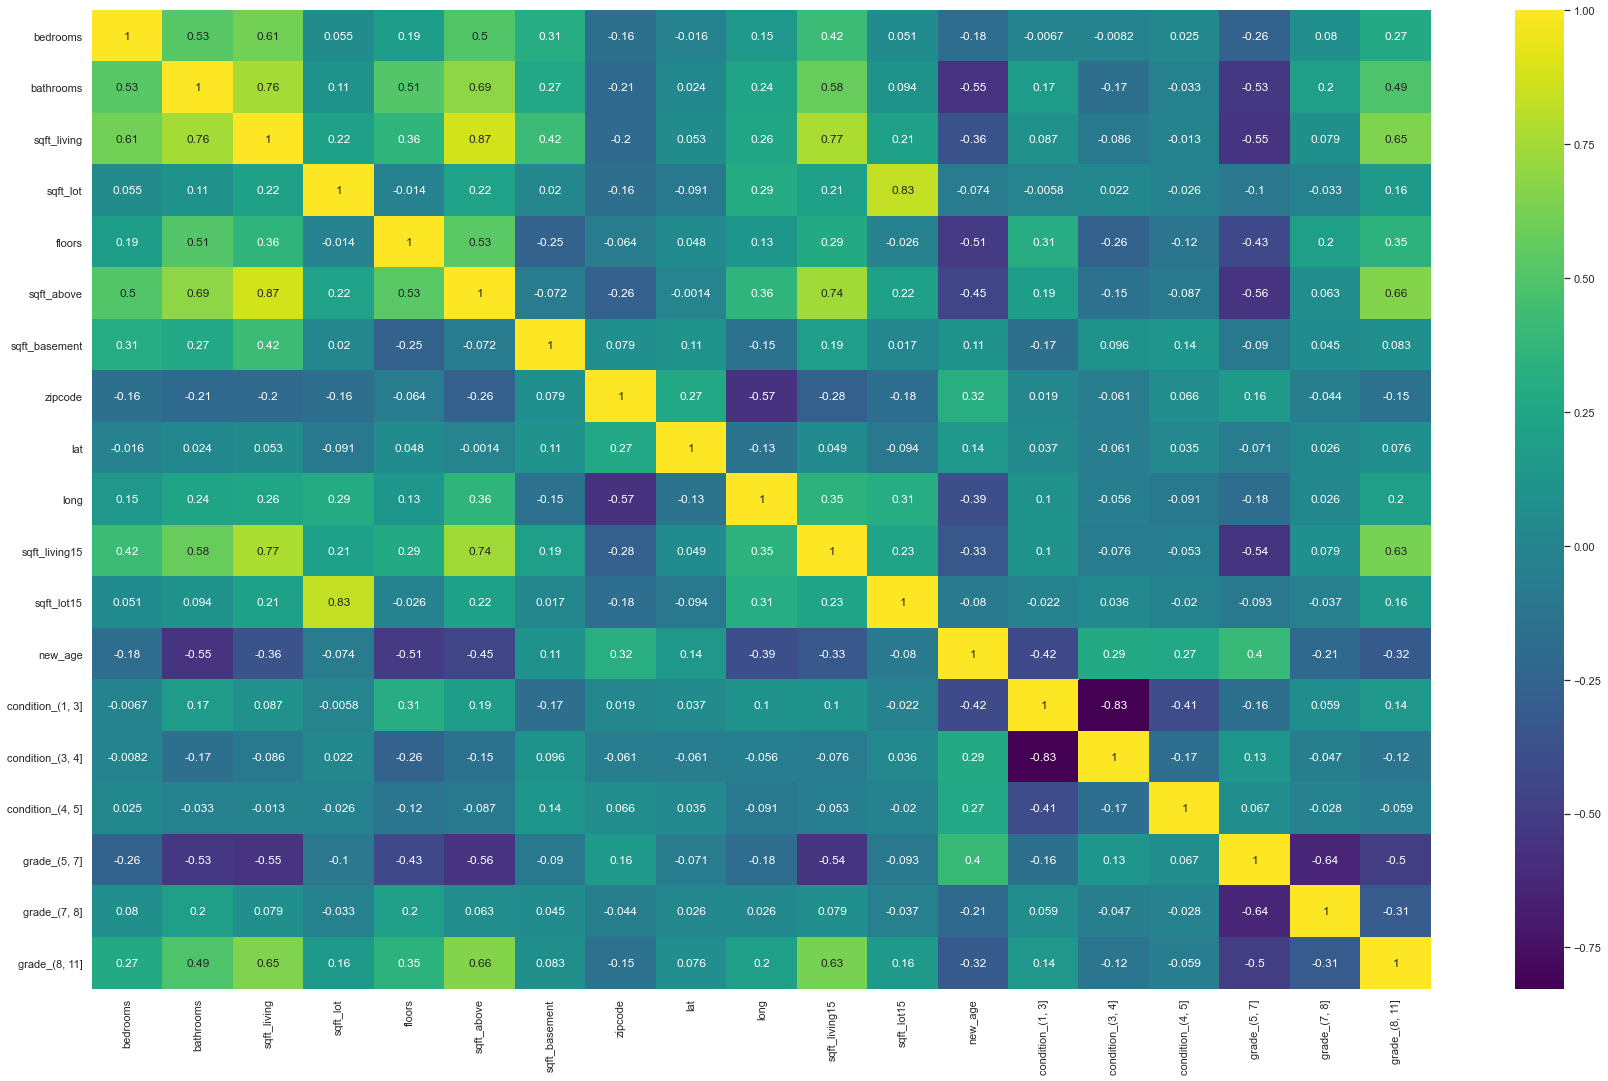

In [33]:
# Correlation Matrix on Training data
corrMatrix = X_train.corr()
sns.set(rc = {'figure.figsize':(30,18)})
sns.heatmap(corrMatrix, annot=True, cmap = 'viridis')
plt.show()

In [34]:
# Custom function to get the name of the column with high correlation
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
# The feature column which have correlation value higher than the threshold (0.85)
corr_features = correlation(X_train, 0.85)
corr_features

{'sqft_above'}

In [36]:
# Removing this column from Training and testing datasets
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

In [37]:
## Linear Regression

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [39]:
# Predicting the values
y_pred_lm = regressor.predict(X_test)

In [40]:
# Computing the absolute error
errors = abs(y_pred_lm - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Linear Regression Model:', round(accuracy, 2), '%.')

Accuracy of Linear Regression Model: 74.84 %.


In [41]:
# Compute r square of the model
print('R^2 value for Linear Regression Model:', round(r2_score(Y_test, y_pred_lm),2))

R^2 value for Linear Regression Model: 0.67


In [42]:
# Compute the Root mean square error of the model
rmse_lm = np.sqrt(mean_squared_error(Y_test,y_pred_lm))
print('RMSE of the Linear model: ', round(rmse_lm,2))

RMSE of the Linear model:  179836.8


In [43]:
## Polynomial Model

In [44]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.fit_transform(X_test)

In [45]:
regressor.fit(x_train_poly,Y_train)
y_pred_poly=regressor.predict(x_test_poly)

In [46]:
# Calculate the absolute errors
errors = abs(y_pred_poly - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Polynomial Model:', round(accuracy, 2), '%.')

Accuracy of Polynomial Model: 79.55 %.


In [47]:
print("R^2 Score for Polynomial Model: %.2f" % r2_score(Y_test,y_pred_poly))

R^2 Score for Polynomial Model: 0.78


In [48]:
# Compute the Root mean square error of the model
rmse_pm = np.sqrt(mean_squared_error(Y_test,y_pred_poly))
print('RMSE of the Polynomial model: ', round(rmse_pm,2))

RMSE of the Polynomial model:  147111.04


In [49]:
## Random Forest

In [50]:
rf = RandomForestRegressor(n_estimators = 25, random_state = 42)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=42)

In [51]:
# Use the forest's predict method on the test data
y_pred_rf = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_pred_rf - Y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy of Random Forest model:', round(accuracy, 2), '%.')

Accuracy of Random Forest model: 86.53 %.


In [52]:
# Compute r square of the model
print('R^2 value for Random Forest Model:', round(r2_score(Y_test, y_pred_rf),2))

R^2 value for Random Forest Model: 0.86


In [53]:
# Compute the Root mean square error of the model
rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf))
print('RMSE of the Random Forest model: ', round(rmse_rf,2))

RMSE of the Random Forest model:  118853.47


In [54]:
# Plot to compare the actual and predicted value for all ML Models

Text(0.5, 1.0, 'The visualization plot of Actual vs Predicted value for different ML Models')

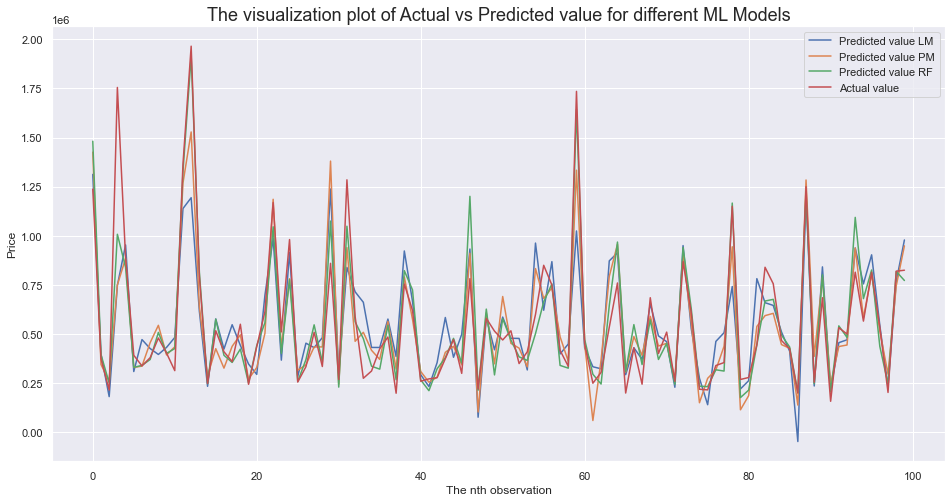

In [55]:
result = pd.DataFrame({'Predicted value LM':y_pred_lm, 'Predicted value PM':y_pred_poly, 'Predicted value RF':y_pred_rf, 'Actual value':Y_test})
fig = plt.figure(figsize=(16,8))
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(result.columns)
plt.ylabel('Price')
plt.xlabel('The nth observation')
plt.title("The visualization plot of Actual vs Predicted value for different ML Models", fontdict = {'fontsize' : 18})